**Group Members:**

 _ |Names | Student Number
---|---|---
1| Bongumusa Mavuso | 1682836
2| Thabo Rachidi | 1632496
3| Thobelani Makeleni | 1199116
4| Siyabonga Hlomuka | 1384685

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Attribute information

* gender: Male/Female
* SeniorCitizen: Senior citizen or not (1,0)
* Partner: Whether customer has a partner or not (1,0)
* Dependents: Whether customer has dependents or not. (Yes, No)
* tenure: No. of months customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetSevice: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) 
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

In [4]:
columns = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure',\
           'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', \
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', \
           'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', names=columns,header=0 )
print(df.shape)

(7043, 21)


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df = df.replace(' ', np.nan)

# Missing values?
print(df.isna().sum())

# Remove Missing values
df = df.dropna()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 1. Categorical features to dummy variables

In [8]:
categ_features = ['gender','Partner','Dependents','PhoneService',\
                  'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', \
                  'PaperlessBilling','PaymentMethod','Churn']
dummies_data = pd.get_dummies(df[categ_features])

# Join the new columns with your original dataframe

new_df = pd.concat([df,dummies_data],axis=1)

# Drop the original columns
new_df.drop(categ_features,axis=1, inplace=True)

# Remove redundant columns
redundant_cols = ['gender_Male','Partner_No','Churn_No','Dependents_No','PaperlessBilling_No',\
                 'PhoneService_No']
new_df.drop(redundant_cols,axis=1,inplace=True)

new_df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.5,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,0,1,1,...,0,1,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,1


In [9]:
# Convert TotalCharges to numeric
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Female                            7032 non-null   uint8  
 6   Partner_Yes                              7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_Yes                         7032 non-null   uint8  
 9   MultipleLines_No                         7032 non-null   uint8  
 10  MultipleLines_No phone service           7032 no

# 2. Plot the different features

In [10]:
def plot_pie_distribution(data,columns,cols=3, W=25,H=45, hspace=0.2, wspace=0.2):
    
    fig = plt.figure(figsize=(W,H))
#     fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = int(np.ceil(float(len(columns)) / cols))
    
    for i,column in enumerate(columns):
        plot_data = data.groupby(column)["Churn"].count()
        labels = plot_data.keys()

        ax = fig.add_subplot(rows, cols, i+1)
        ax.pie(plot_data,labels=labels,autopct="%.1f%%", pctdistance=0.5)
        ax.set_title(f'Churn by {column}',fontsize=18)
    
#     sns.catplot(x="Churn", y=column, kind="box", data=data)
    

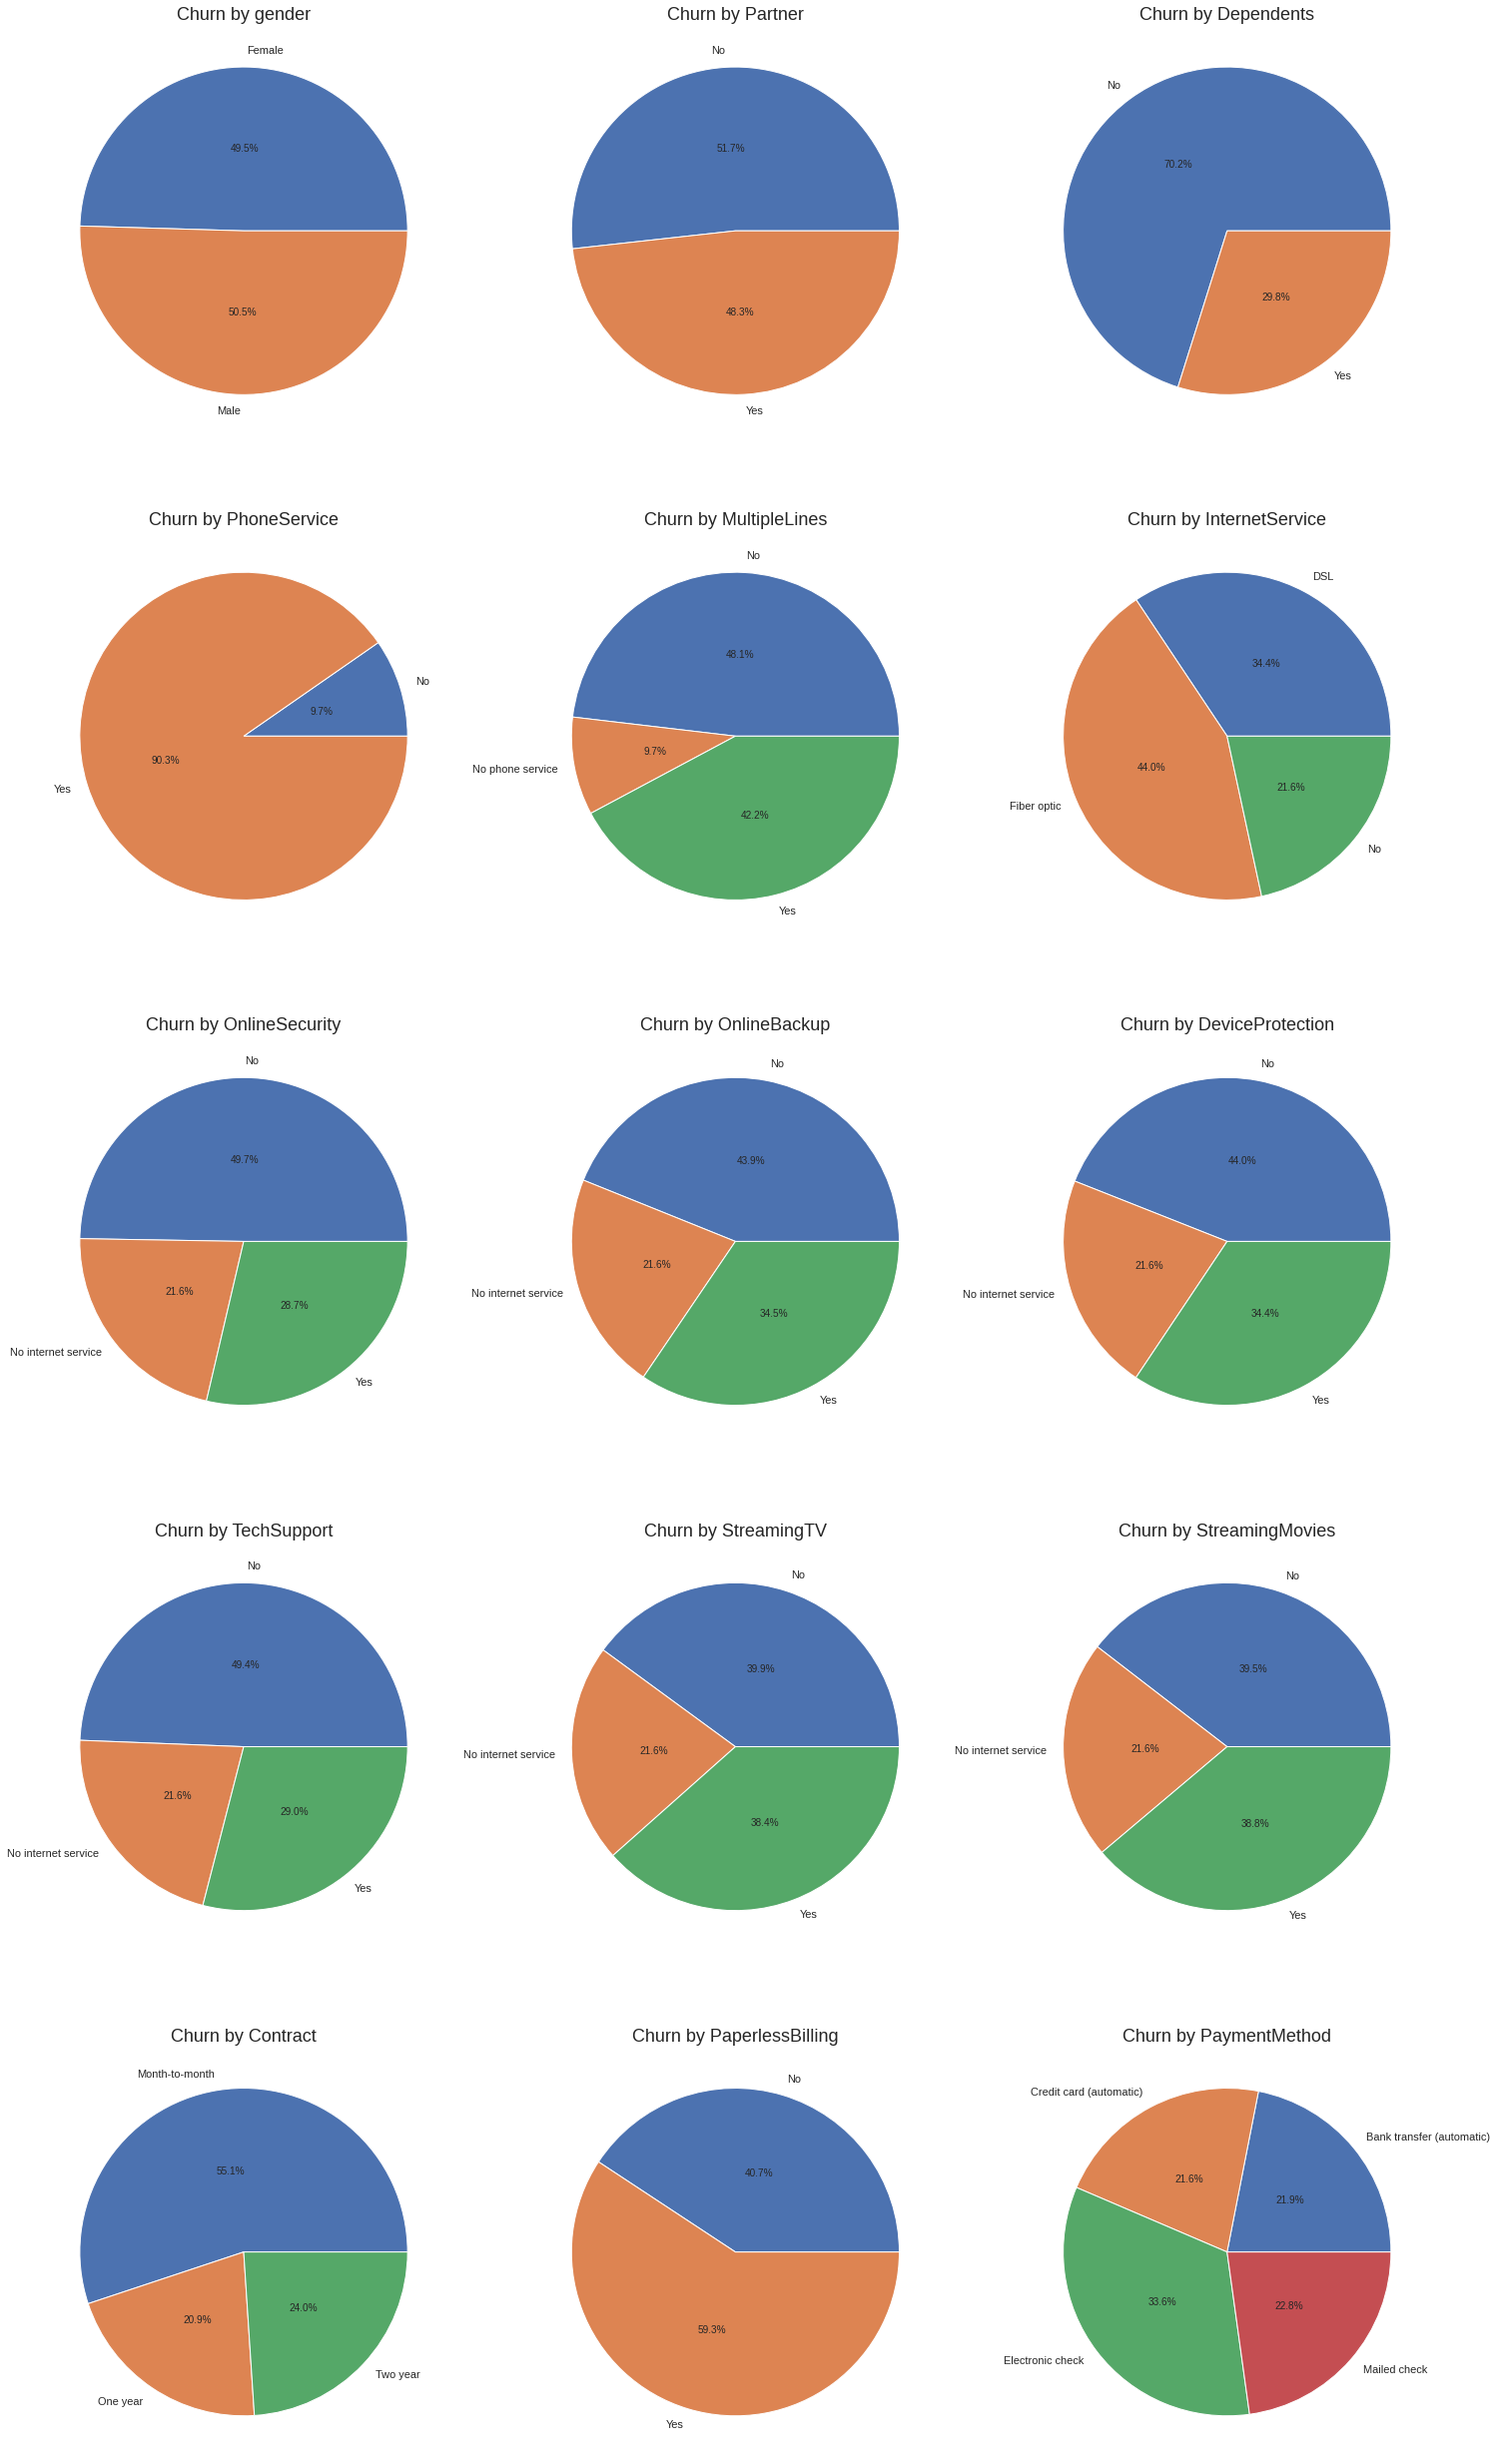

In [11]:
# Plot pie charts for all the categorical features
plot_pie_distribution(df,categ_features[:-1])

# 3. Relationship between tenure and contract duration

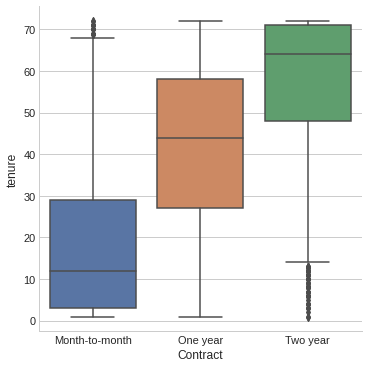

In [12]:
# Plot 
sns.catplot(x="Contract", y="tenure",kind="box", data=df)

**Using the visualisation above we can see that there is a strong positive relationship between tenure and Contract. As the contract duration increases so does the tenure.**

# 4. Correlation between Churn and the other variables

In [13]:
from sklearn.feature_selection import f_regression, mutual_info_classif
new_df.iloc[:,1:-1]
mutual_info = mutual_info_classif(X=new_df.iloc[:,1:-1],y=new_df['Churn_Yes'])
print(mutual_info)

[0.00318246 0.07197215 0.04580392 0.044466   0.00941326 0.00667114
 0.02538051 0.         0.         0.00047167 0.00455389 0.00640859
 0.04942425 0.02617069 0.06686587 0.03017497 0.01209411 0.0351071
 0.02533805 0.00703372 0.02737874 0.02610232 0.00470546 0.06232318
 0.02214178 0.01412875 0.00526008 0.03374649 0.00101001 0.00138717
 0.03650145 0.00598804 0.0866345  0.01974826 0.05863105 0.01896753
 0.01025093 0.00460633 0.04545165 0.00017177]


In [14]:
zero_idx = np.where(mutual_info == 0.0)
new_df.columns[zero_idx]

Index(['Dependents_Yes', 'PhoneService_Yes'], dtype='object')

**Mutual information measures the information that two variables X and Y share. Thus if we have MI of zero it means that knowing X does not give us any information about Y. We can see that the columns TotalCharges, MultipleLines_No, OnlineBackup_No internet service, StreamingTV_No internet service and PaymentMethod_Bank transfer (automatic) have zero mutual information and thus give us no information about the target variable Churn_Yes**

In [33]:
new_df.corr()[:]['Churn_Yes'][np.argsort(new_df.corr()[:]['Churn_Yes'])]

tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

**From the correlations above we can see that there are no strong negative or postive correlations in the dataset**

# 5. Produce some Churn plots

In [16]:
features_plot = ['tenure','Contract_Month-to-month','Contract_One year','Contract_Two year',\
                'SeniorCitizen','MonthlyCharges','TotalCharges']

Text(0.5, 1.0, 'Churn vs tenure')

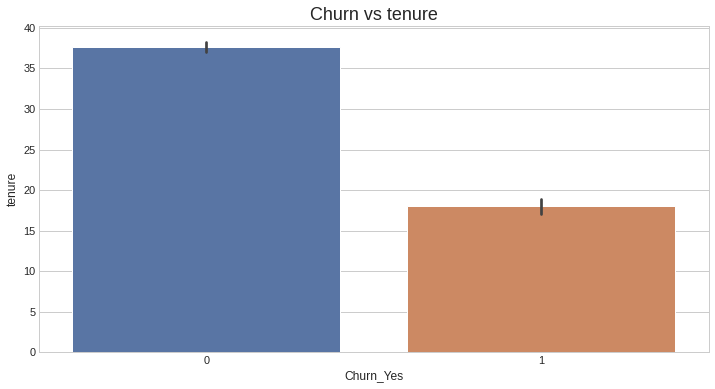

In [17]:
# Tenure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x='Churn_Yes', y="tenure",data=new_df)
ax.set_title('Churn vs tenure',fontsize=18)

Text(0, 0.5, 'Percentage of Contract_Two year')

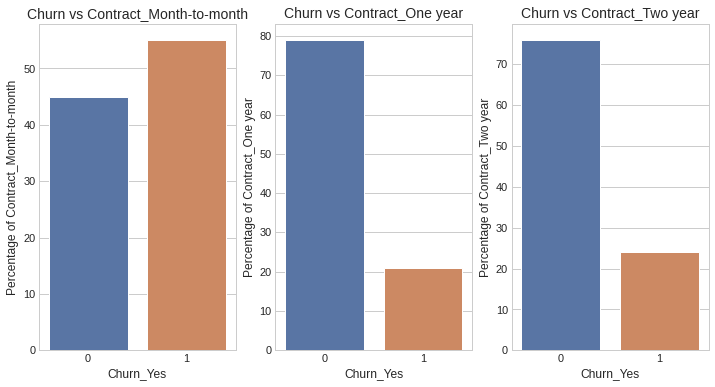

In [18]:
# Contract
plot_data1 = new_df.groupby('Contract_Month-to-month').agg(percentage =('Churn_Yes', lambda p: p.count() / new_df.shape[0] * 100))
plot_data2 = new_df.groupby('Contract_One year').agg(percentage =('Churn_Yes', lambda p: p.count() / new_df.shape[0] * 100))
plot_data3 = new_df.groupby('Contract_Two year').agg(percentage =('Churn_Yes', lambda p: p.count() / new_df.shape[0] * 100))



fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 3, 1)
ax = sns.barplot(x=plot_data1.index, y='percentage',data=plot_data1)
ax.set_title('Churn vs Contract_Month-to-month',fontsize=14)
ax.set_xlabel ("Churn_Yes")
ax.set_ylabel ("Percentage of Contract_Month-to-month")

ax = fig.add_subplot(1, 3, 2)
ax = sns.barplot(x=plot_data2.index, y='percentage',data=plot_data2)
ax.set_title('Churn vs Contract_One year',fontsize=14)
ax.set_xlabel ("Churn_Yes")
ax.set_ylabel ("Percentage of Contract_One year")

ax = fig.add_subplot(1, 3, 3)
ax = sns.barplot(x=plot_data3.index, y='percentage',data=plot_data3)
ax.set_title('Churn vs Contract_Two year',fontsize=14)
ax.set_xlabel ("Churn_Yes")
ax.set_ylabel ("Percentage of Contract_Two year")

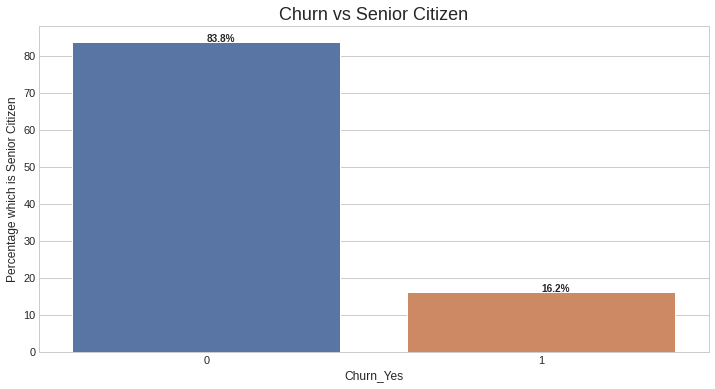

In [19]:
# plot_data = new_df.groupby('SeniorCitizen')["Churn_Yes"].count()
plot_data = new_df.groupby('SeniorCitizen').agg(percentage =('Churn_Yes', lambda p: p.count() / new_df.shape[0] * 100)).round(2)


# SeniorCitizen(age?)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x=plot_data.index, y="percentage",data=plot_data)
ax.set_title('Churn vs Senior Citizen',fontsize=18)
ax.set_xlabel ("Churn_Yes")
ax.set_ylabel ("Percentage which is Senior Citizen")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

Text(0.5, 1.0, 'Churn vs Monthly Charges')

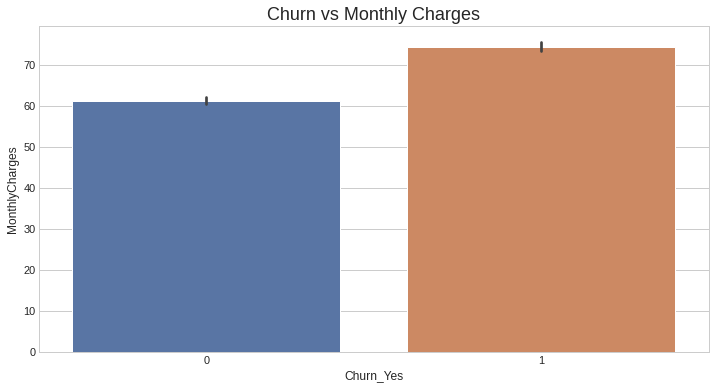

In [20]:
# Monthly Charges
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x='Churn_Yes', y="MonthlyCharges",data=new_df)
ax.set_title('Churn vs Monthly Charges',fontsize=18)

Text(0.5, 1.0, 'Churn vs Total Charges')

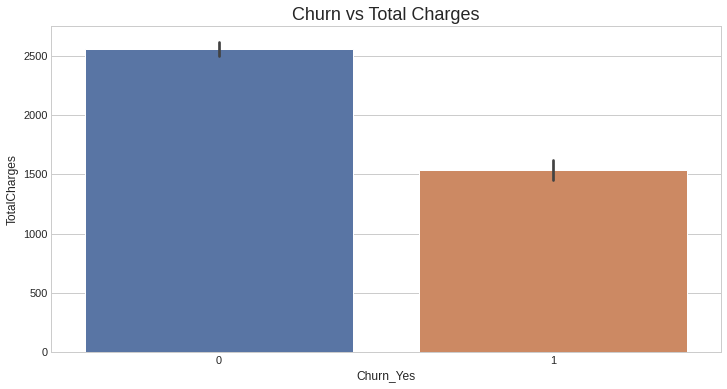

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(x='Churn_Yes', y="TotalCharges",data=new_df)
ax.set_title('Churn vs Total Charges',fontsize=18)

# 6. Get a list of the most important features

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X = new_df.iloc[:,1:-1]
y = new_df.iloc[:,-1]

# Logistic Regression
clf = LogisticRegression(random_state = 0)
clf.fit(X, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

Text(0.5, 0, 'Relative Feature Importance')

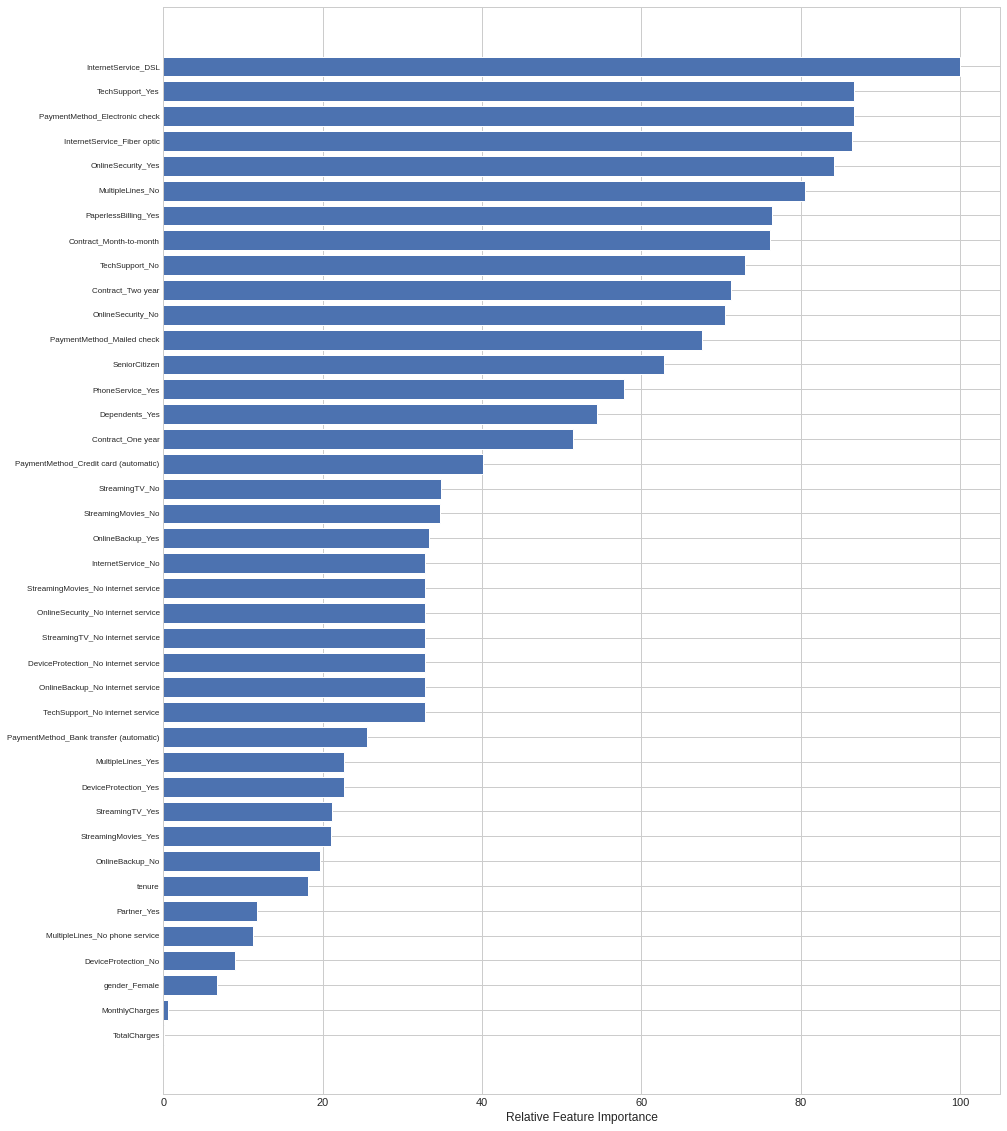

In [31]:
featfig = plt.figure(figsize=(15,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Random forest
forest = RandomForestClassifier()
forest.fit(X, y)

feature_importance2 = forest.feature_importances_
feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())
sorted_idx2 = np.argsort(feature_importance2)
pos2 = np.arange(sorted_idx2.shape[0]) + .5

Text(0.5, 0, 'Relative Feature Importance')

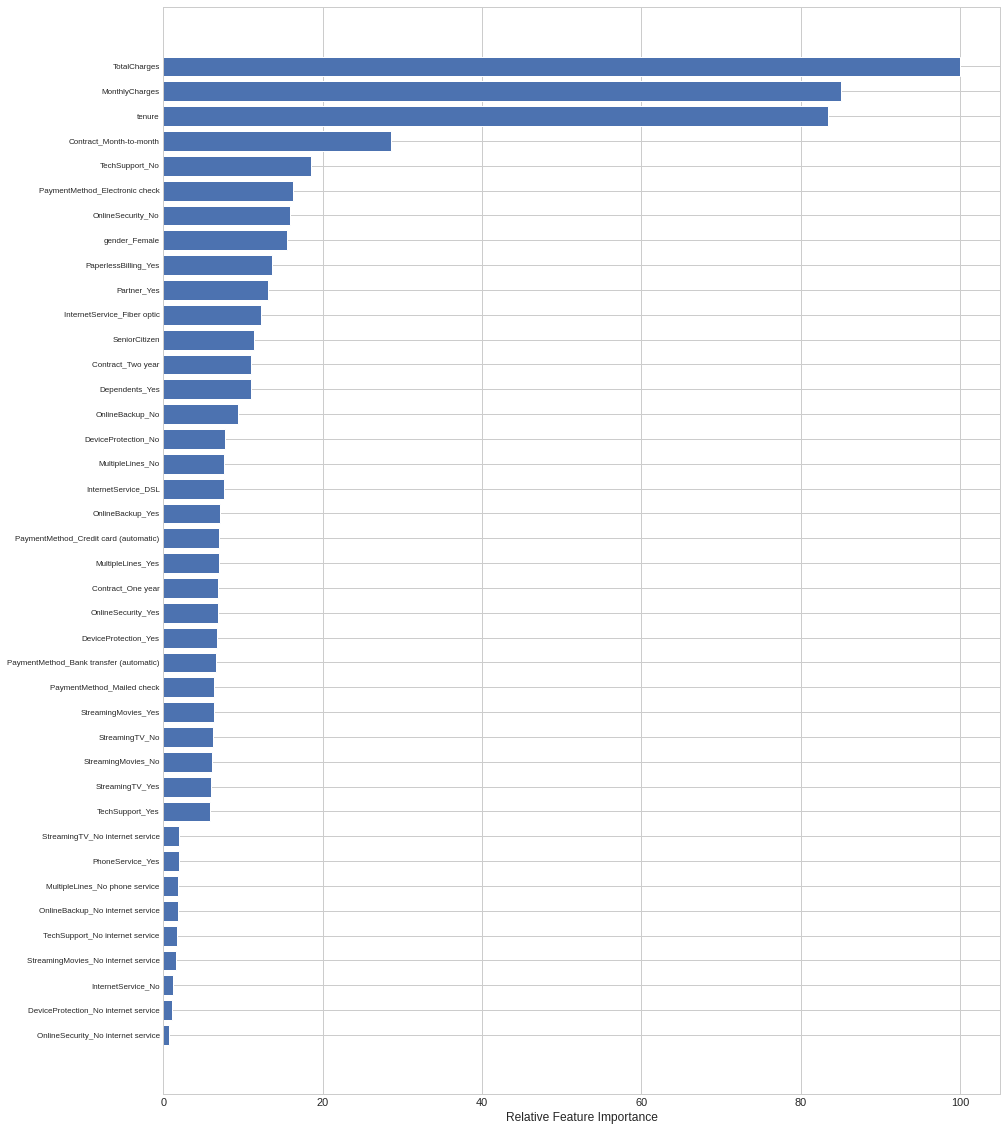

In [30]:
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance2[sorted_idx2], align='center')
ax.set_yticks(pos2)
ax.set_yticklabels(np.array(X.columns)[sorted_idx2], fontsize=8)
ax.set_xlabel('Relative Feature Importance')

**The two methods above have different features as being important. Logisitic regression has InternetService_DSL, TechSupport_Yes and PaymentMethod_Electronic check as the top 3 important features where Random forest has TotalCharges, MonthlyCharges and tenure as the top 3 important features.**

**From the results above, we have TechSupport_No, OnlineSecurity_No, Contract_Month-to-month as having the strongest positve correlation and tenure, Contract_Two year, StreamingMovies_No internet service have the strongest negative correlation. Tenure is the only feature that apears as being an important feature from the Random Forest procedure. This could indicate the importance of the tenure feature in influencing the Churn**